In [3]:
import laspy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull
from scipy.interpolate import griddata

### Read the Terrestrial LiDAR Data

In [4]:
# Replace with the path to your .laz file
laz_file_path = 'CASBC_0001_20240910_1.laz'

# Open the .laz file using laspy
with laspy.open(laz_file_path) as las:
    # Read the point data
    point_cloud = las.read()
    
# Convert point cloud to numpy arrays
x = np.array(point_cloud.x)
y = np.array(point_cloud.y)
z = np.array(point_cloud.z)

# print some basic information about the file
print(f"Number of points: {len(x)}")
print(f"File header information: {las.header}")

Number of points: 5043294
File header information: <LasHeader(1.4, <PointFormat(7, 0 bytes of extra dims)>)>


### Calculate Basic EDA Features

          x         y         z
0  0.887801  0.006639 -1.530114
1  0.894944  0.006659 -1.538397
2  0.865284  0.006496 -1.482763
3  0.858373  0.006446 -1.466822
4  0.862717  0.006452 -1.470362
Basic Statistics:
                  x             y             z
count  5.043294e+06  5.043294e+06  5.043294e+06
mean  -5.486926e-01  9.176233e-01 -6.761326e-01
std    5.400602e+00  4.743485e+00  1.876663e+00
min   -5.195738e+01 -2.616413e+01 -1.151015e+01
25%   -1.146212e+00 -9.174836e-01 -1.312179e+00
50%   -5.750790e-02 -5.041145e-02 -7.455369e-01
75%    1.205557e+00  1.687909e+00 -1.938032e-01
max    5.291031e+01  5.356737e+01  2.679758e+01


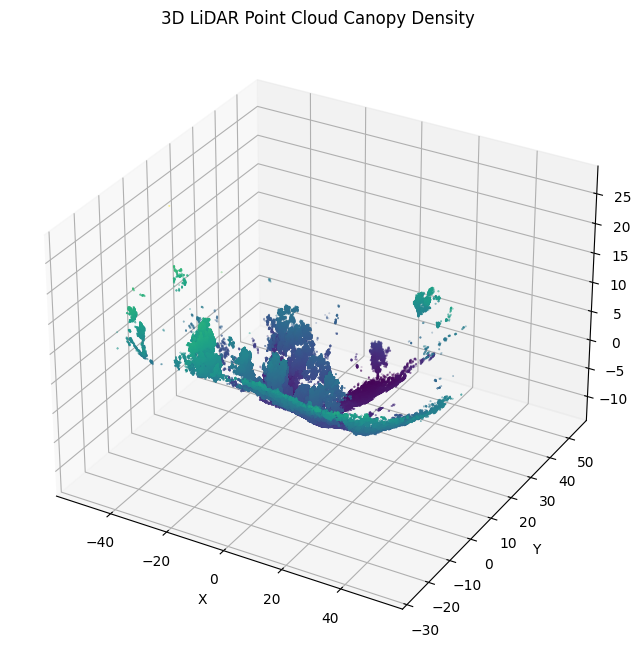

Point Density (points per square unit area): 603.17


In [5]:
# Convert LiDAR data into a Pandas DataFrame for easier exploration
# Create a DataFrame from the LiDAR point cloud data
df = pd.DataFrame({'x': x.tolist(), 'y': y.tolist(), 'z': z.tolist()})

# Verify the DataFrame is correctly created
print(df.head())

# Basic descriptive statistics
print("Basic Statistics:")
print(df.describe())

# Plot the 3D point cloud distribution
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=0.1, c=z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D LiDAR Point Cloud Canopy Density')
plt.show()

# Calculate point density
point_density = len(x) / (np.ptp(x) * np.ptp(y))  # Point density = points per unit area
print(f"Point Density (points per square unit area): {point_density:.2f}")

### Canopy Height Model (CHM) and Vegetation Analysis

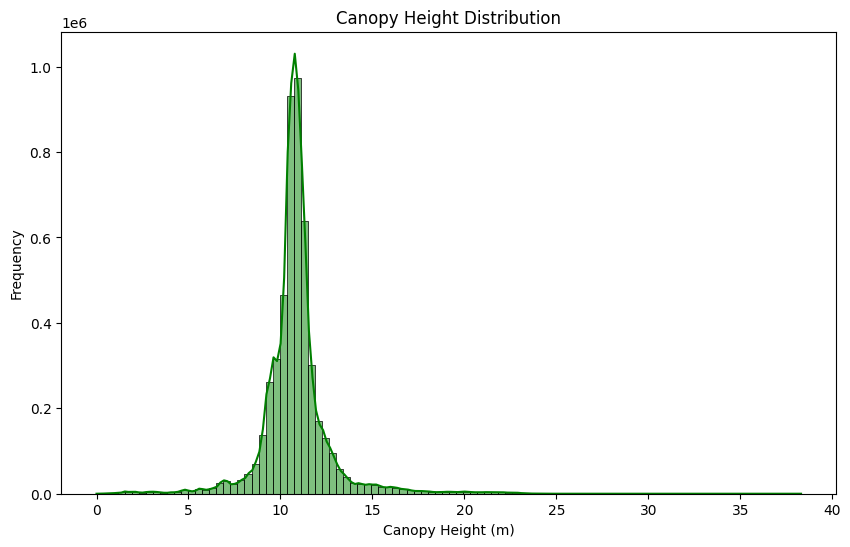

In [6]:
# Ground points are typically the lowest Z values, you can define a threshold or use a statistical approach
ground_threshold = np.percentile(z, 10)  # For simplicity, using 10th percentile as ground threshold
ground_points = z[z <= ground_threshold]

# Calculate the canopy height by subtracting ground elevation from overall point heights
canopy_height = z - np.min(ground_points)

# Visualize Canopy Height Distribution
plt.figure(figsize=(10, 6))
sns.histplot(canopy_height, bins=100, color='green', kde=True)
plt.title('Canopy Height Distribution')
plt.xlabel('Canopy Height (m)')
plt.ylabel('Frequency')
plt.show()

### Terrain Slope Analysis

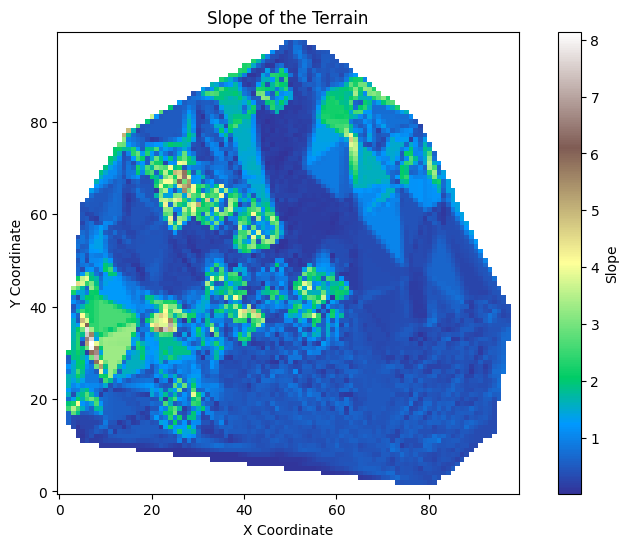

In [7]:
#Define the grid resolution (assuming x and y are uniformly spaced in a region)
grid_x, grid_y = np.meshgrid(np.linspace(np.min(x), np.max(x), 100), np.linspace(np.min(y), np.max(y), 100))

# Interpolate the z-values (elevation) onto this grid
grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')

# Calculate slope (gradient) using numpy's gradient function
dx, dy = np.gradient(grid_z, axis=(1, 0))  # Calculate gradients in x and y direction

# Calculate the slope (magnitude of the gradient)
slope = np.sqrt(dx**2 + dy**2)

# Visualize the slope
plt.figure(figsize=(10, 6))
plt.imshow(slope, cmap='terrain', origin='lower')
plt.colorbar(label='Slope')
plt.title('Slope of the Terrain')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

### Canopy Density and Vegetation Structure

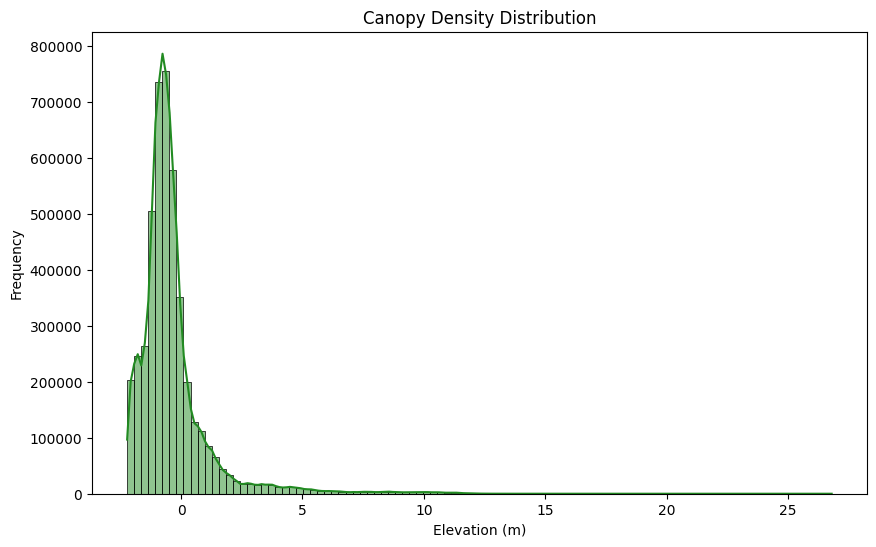

In [8]:
# Canopy density can be analyzed by filtering out ground points
canopy_points = z[z > ground_threshold]

# Visualize the density of canopy points
plt.figure(figsize=(10, 6))
sns.histplot(canopy_points, bins=100, color='forestgreen', kde=True)
plt.title('Canopy Density Distribution')
plt.xlabel('Elevation (m)')
plt.ylabel('Frequency')
plt.show()